Importando as bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook
import seaborn as sns

Carregando a base de dados e salvando em um DataFrame chamado "df"

In [2]:
df = pd.read_table('german.data', sep = ' ',
                   index_col = False,
                   names = list(range(1,22)))
#target: (1 = Good, 2 = Bad) 
df

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


In [3]:
col_names = ['Status of existing checking account',
     'Duration in month',
     'Credit history',
     'Purpose',
     'Credit amount',
     'Savings account/bonds',
     'Present employment since',
     'Installment rate in percentage of disposable income',
     'Personal status and sex',
     'Other debtors / guarantors',
     'Present residence since',
     'Property',
     'Age in years',
     'Other installment plans',
     'Housing',
     'Number of existing credits at this bank',
     'Job',
     'Number of people being liable to provide maintenance for',
     'Telephone',
     'foreign worker',
     'credit risk'
        ]
df.columns = col_names
df

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,credit risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


Vamos olhar se realmente não tem dados faltantes

In [4]:
#checking if there is missing values
print(f"Number of existing data in each attribute:\n{'-'*40}\n{df.count()}")

Number of existing data in each attribute:
----------------------------------------
Status of existing checking account                         1000
Duration in month                                           1000
Credit history                                              1000
Purpose                                                     1000
Credit amount                                               1000
Savings account/bonds                                       1000
Present employment since                                    1000
Installment rate in percentage of disposable income         1000
Personal status and sex                                     1000
Other debtors / guarantors                                  1000
Present residence since                                     1000
Property                                                    1000
Age in years                                                1000
Other installment plans                                     1000
Housin

In [5]:
qty_examples = len(df)
qty_bad_credit = len(df[df['credit risk'] == 2])
qty_good_credit = qty_examples - qty_bad_credit

print(f"""
Neste dataset temos {qty_examples} exemplos (dados únicos), dos quais: 
{qty_good_credit} são classificados como 'bons pagadores', e
{qty_bad_credit} são classificados como 'maus pagadores'.
""")


Neste dataset temos 1000 exemplos (dados únicos), dos quais: 
700 são classificados como 'bons pagadores', e
300 são classificados como 'maus pagadores'.



# Data Visualization

In [6]:
# numericals = ['Duration in month',
#               'Credit amount',
#               'Installment rate in percentage of disposable income',
#               'Present residence since',
#               'Age in years',
#               'Number of existing credits at this bank',
#               'Number of people being liable to provide maintenance for',
#               'credit risk'
#              ]
# qualitatives = ['Status of existing checking account',
#                'Credit history',
#                 'Purpose',
#                 'Savings account/bonds',
#                 'Present employment since',
#                 'Personal status and sex',
#                 'Other debtors / guarantors',
#                 'Property',
#                 'Other installment plans',
#                 'Housing',
#                 'Job',
#                 'Telephone',
#                 'foreign worker'
#             ]

Primeiramente vamos alterar o valor da classe dos dados de 1 para 'Good' e 2 para 'Bad' para facilitar o entendimento durante visualização dos gráficos a seguir

In [7]:
#changing the target from numerical to categorical
df['credit risk'].replace({1: 'Good',
                           2: 'Bad'}, inplace=True)
df.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,credit risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,Good
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,Bad
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,Good
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,Good
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,Bad


Como primeiro gráfico vamos olhar a distribuição das classes. Em outras palavras, vamos "visualizar" quantas amostras temos de cada um dos dois tipos de risco de crédito (bom e ruim).


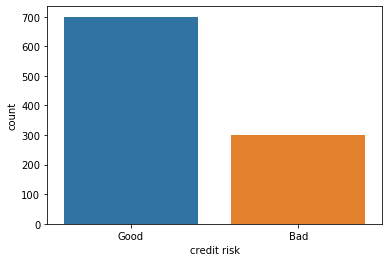

In [8]:
#checking if the dataset is balanced.
sns.countplot(df['credit risk'])

Agora vamos ver qual a correlação entre cada par de atributo numérico do dataset

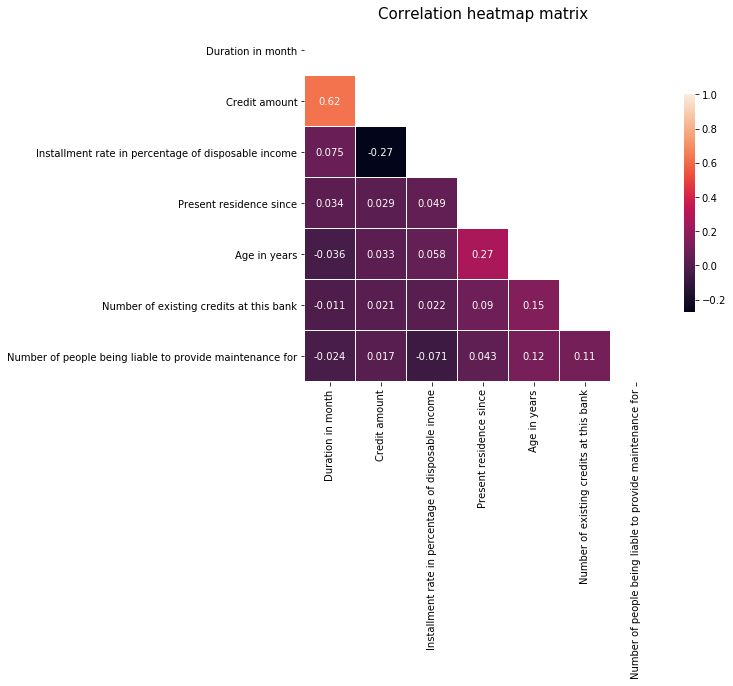

In [9]:
import numpy as np

correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

%matplotlib inline
plt.figure(figsize=(8,8))
plt.title("Correlation heatmap matrix", fontsize=15)
sns.heatmap(correlation_matrix, mask=mask,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


A matriz de correlação acima mostrou que há uma correlação média-forte positiva, a maior correlação desta base de dados, entre os atributos "quantidade de crédito" e "duração em mês". Vamos olhar agora a disposição dos dados considerando apenas estes dois atributos.

No gráfico abaixo, a correlação é similar entre os clientes classificados como bons e maus pagadores. Não temos muita informação nova, este tipo de correlação pode ser informalmente considerado de conhecimento popular, quanto maior o crédito, na média, mais tempo é solicitado/permitido para o pagamento.

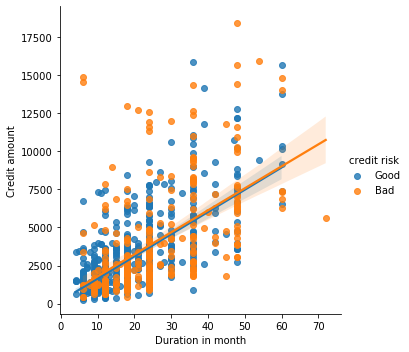

In [10]:
# plt.figure()
sns.lmplot(x="Duration in month", y="Credit amount", hue="credit risk", data=df)

Nos gráficos abaixo vamos analisar o atributo taxa de parcelamento.

No primeiro gráfico, pode-se notar que nas quatro taxas (1, 2, 3 e 4) a quantidade de clientes classificados como bons pagadores é pelo menos duas vezes maior do que a quantidade de clientes classificados como maus pagadores.

No segundo gráfico, podemos ver a distribuição da quantidade de credito entre cada taxa de parcelamento separando também os clientes bons e maus pagadores dentro de cada uma das quatro taxas. Aqui podemos notar que os maus pagadores, em média, solicitaram valor de crédito maior do que os bons pagadores.

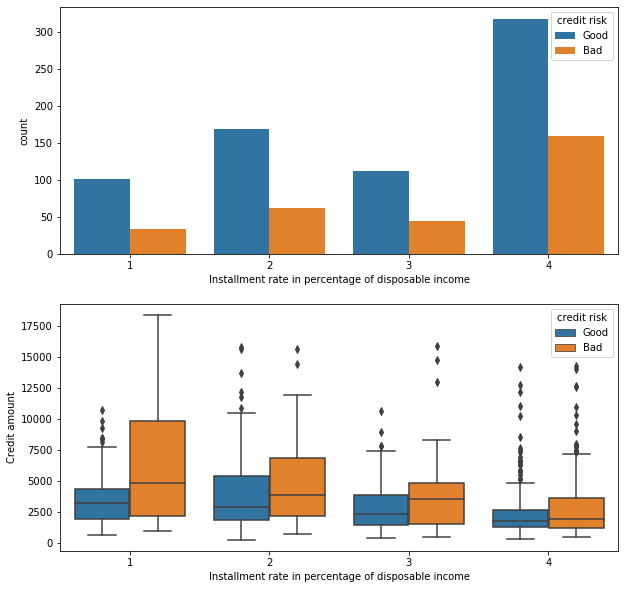

In [11]:
%matplotlib inline
plt.figure(figsize=(10,10))
plt.subplot(211)
sns.countplot(df['Installment rate in percentage of disposable income'], hue=df['credit risk'])
plt.subplot(212)
sns.boxplot(x=df['Installment rate in percentage of disposable income'], y=df['Credit amount'], hue=df['credit risk'])

Vamos olhar agora a distribuição de frequências dos atributos 'quantidade de crédito', 'idade em anos' e 'duração em mês'.


No primeiro gráfico, podemos notar que 81.2% dos valores de crédito são abaixo de 5000;
No segundo gráfico, podemos notar que 70.1% dos clientes de crédito possui menos de 40 anos;
No terceiro gráfico, podemos notar que para 58.6% dos clientes a 'duração' tem sido menor que 24 meses (2 anos), onde também podemos ver alguns picos a cada 12 meses completos: 12, 24, 36, 48 e 60.



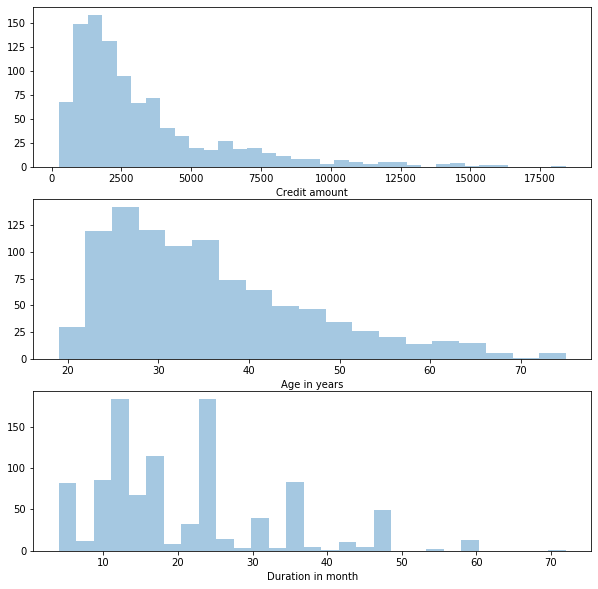

In [12]:
perc_credit_amount  = (len(df[df['Credit amount'] < 5000]) / qty_examples) * 100
perc_age_years      = (len(df[df['Age in years'] < 40]) / qty_examples) * 100
perc_duration_month = (len(df[df['Duration in month'] < 24]) / qty_examples) * 100

print(f"""
No primeiro gráfico, podemos notar que {perc_credit_amount:.1f}% dos valores de crédito são abaixo de 5000;
No segundo gráfico, podemos notar que {perc_age_years:.1f}% dos clientes de crédito possui menos de 40 anos;
No terceiro gráfico, podemos notar que para {perc_duration_month:.1f}% dos clientes a 'duração' tem sido menor que 24 meses (2 anos), onde também podemos ver alguns picos a cada 12 meses completos: 12, 24, 36, 48 e 60.
""")


%matplotlib inline
# sns.jointplot("Duration in month", "Credit amount", data=df, kind='reg');
plt.figure(figsize=(10,10))
plt.subplot(311)
sns.distplot(df['Credit amount'],kde=False)
plt.subplot(312)
sns.distplot(df['Age in years'],kde=False)
plt.subplot(313)
sns.distplot(df['Duration in month'], kde=False)


Agora vamos analisar a disposição dos dados entre os atributos "quantidade de crédito" e "idade em anos".


    Há 8 bons pagadores e 20 maus pagadores que solicitaram uma quantia de crédito acima de 11100 (linha verde).
    Para esse grupo, a taxa de inadimplência seria de 71.4%, caso o empréstimo fosse concretizado e não pago.
    

    Há 5 bons pagadores e 14 maus pagadores que solicitaram uma quantia de crédito acima de 12250 (linha vermelha).
    Para esse grupo, a taxa de inadimplência seria de 73.7%, caso o empréstimo fosse concretizado e não pago.
    

    Obs: Há uma leve correlação positiva entre a idade e o valor do crédito solicitado
    para os maus pagadores. Ou seja, quanto mais avançada a idade do solicitante e maior 
    a quantidade de crédito solicitada, maior a chance de inadimplência.



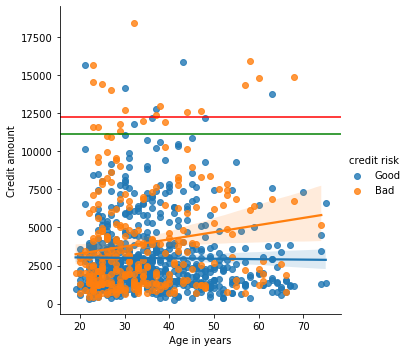

In [13]:
credit_amount = [(11100, 'verde') , (12250, 'vermelha')]

for cr_am, cor_linha in credit_amount:
    good = len(df[(df['Credit amount'] > cr_am) & (df['credit risk'] == 'Good')] )
    bad = len(df[(df['Credit amount'] > cr_am) & (df['credit risk'] == 'Bad')] )
    risk = bad / (good + bad) * 100

    print(f"""
    Há {good} bons pagadores e {bad} maus pagadores que solicitaram uma quantia de crédito acima de {cr_am} (linha {cor_linha}).
    Para esse grupo, a taxa de inadimplência seria de {round(risk,1)}%, caso o empréstimo fosse concretizado e não pago.
    """)

sns.lmplot(x="Age in years", y="Credit amount", hue="credit risk",data=df) # axhline()

plt.axhline(y = credit_amount[0][0], color = 'g', linestyle = '-')
plt.axhline(y = credit_amount[1][0], color = 'r', linestyle = '-')
print(f"""
    Obs: Há uma leve correlação positiva entre a idade e o valor do crédito solicitado
    para os maus pagadores. Ou seja, quanto mais avançada a idade do solicitante e maior 
    a quantidade de crédito solicitada, maior a chance de inadimplência.
""")


Detalhando um pouco mais a correlação positiva exibida no gráfico anterior, vamos olhar as mesmas 
variáveis ('idade em anos' e 'quantidade de crédito'), agora separando os dados pelo "sexo e estado civil".


O subgrupo onde essa correlação é predominante é no 'A92 : female : divorced/separated/married',
como pode ser visto no segundo gráfico, da esquerda para a direita.

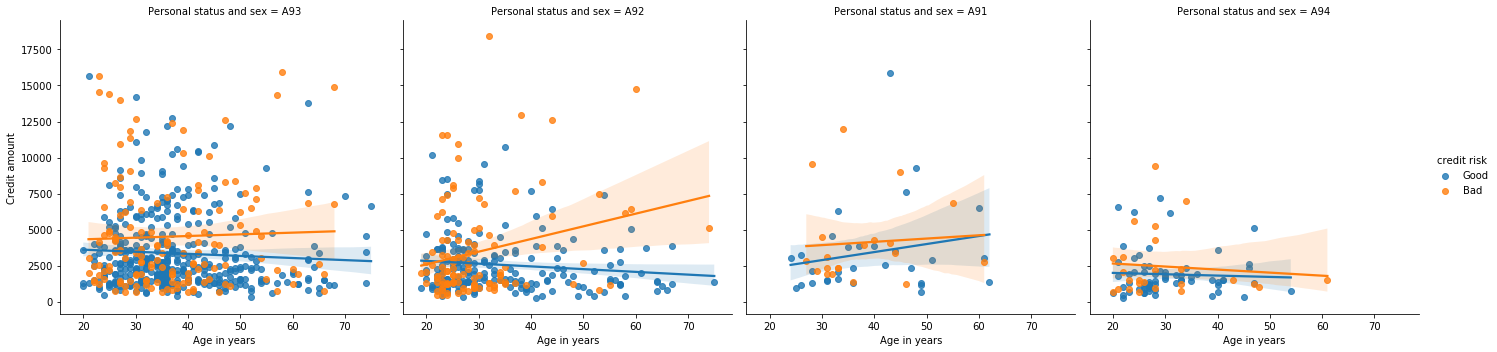

In [14]:
sns.lmplot(x="Age in years", y="Credit amount", hue="credit risk",data=df, col="Personal status and sex")
# """
# Attribute 9: (qualitative)
# Personal status and sex
# A91 : male : divorced/separated
# A92 : female : divorced/separated/married
# A93 : male : single
# A94 : male : married/widowed
# A95 : female : single 
# """

Abaixo vamos vazer uma outra análise, utilizando desta vez como base as variáveis "estado civil e sexo" e "duração em anos". Vamos agrupar os dados em duas formas de visualização, 
a primeiro compara diretamente a distribuição entre os bons e maus pagadores para cada "estado civil e sexo",
já a segundo compara diretamente a distribuição entre os diferentes grupos de "estado civil e sexo" 
para cada um dos grupos de risco de crédito.

Pelo primeiro gráfico podemos notar que em todos os quatro grupos a maioria dos maus pagadores 
solicitou crédito com um prazo maior.

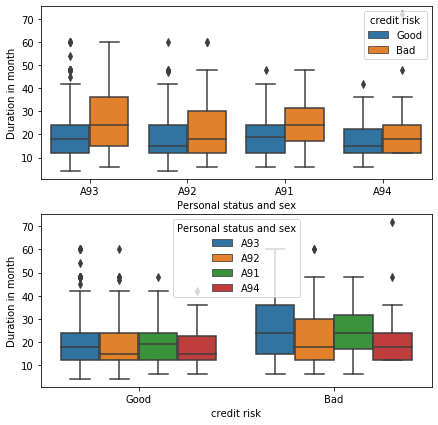

In [15]:
plt.figure(figsize=(7,7))
plt.subplot(211)
sns.boxplot(x="Personal status and sex", y="Duration in month", hue="credit risk",data=df)
plt.subplot(212)
sns.boxplot(x="credit risk", y="Duration in month", hue="Personal status and sex",data=df)

De forma parecida com o gráfico anterior aqui vemos a comparação dos bons e maus pagadores entre 
os grupos "estado civil e sexo", porém desta vez em razão de suas idades (eixo y).

Podemos notar pela linha que representa a mediana que em três dos quatro grupos a maioria dos 
maus pagadores tem menor idade do que os bons pagadores dentro do mesmo grupo "estado civil e sexo". 
Em palavras mais simples, podemos dizer que os solicitantes mais jovens dessa base de dados possuem 
melhor status de crédito (bons pagadores)

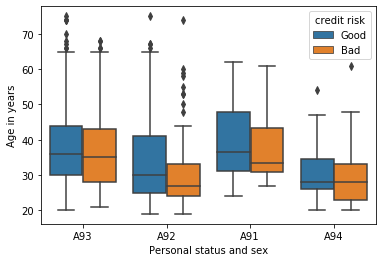

In [16]:
sns.boxplot(x="Personal status and sex", y="Age in years", hue="credit risk",data=df)

---

# Machine Learning

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from cf_matrix import make_confusion_matrix
    #https://github.com/DTrimarchi10/confusion_matrix
from sklearn.metrics import plot_roc_curve

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


Voltando o nome das colunas para numérico para simplicar a conversão dos dados de categório para numérico

In [18]:
# Changing the column names back to numbers to simplify the replacing
df.columns = range(1,22)
df

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,Good
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,Bad
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,Good
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,Good
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,Good
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,Good
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,Good
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,Bad


Como a forma de categorizar os dados foi feita utilizando o padrão 
"A" + posição do atributo + valor numérico

Fiz um laço que percorre o dataset removendo "A" + posição do atributo, deixando somente o valor numérico 
que foi atribuído originalmente pelo disponibilizador dos dados, para que possa ser utilizado por algorítmos de
machine learning que não trabalham com dados categóricos.

In [19]:
replace = [(1,'A1'),
           (3,'A3'),
           (4,'A4'),
           (6,'A6'),
           (7,'A7'),
           (9,'A9'),
           (10,'A10'),
           (12,'A12'),
           (14,'A14'),
           (15,'A15'),
           (17,'A17'),
           (19,'A19'),
           (20,'A20')]

for col_name, rep in replace:
    df[col_name].replace(rep, '', regex=True, inplace=True)

    
# colocando a classe foco como 1
df[21].replace({'Good': 0,
                'Bad': 1}, inplace=True)

df.head()

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,1,6,4,3,1169,5,5,4,3,1,...,1,67,3,2,2,3,1,2,1,0
1,2,48,2,3,5951,1,3,2,2,1,...,1,22,3,2,1,3,1,1,1,1
2,4,12,4,6,2096,1,4,2,3,1,...,1,49,3,2,1,2,2,1,1,0
3,1,42,2,2,7882,1,4,2,3,3,...,2,45,3,3,1,3,2,1,1,0
4,1,24,3,0,4870,1,3,3,3,1,...,4,53,3,3,2,3,2,1,1,1


Para uma primeira análise mais simples, vamos separar 80% dos dados para treinar o 'modelo' e 20% dos dados para testar o mesmo.

In [20]:
data   = df.iloc[:, :-1]
target = df.iloc[:, -1:]

data_train, data_test, target_train, target_test = train_test_split(
    data, target, stratify=target, test_size=0.2, random_state=137)

data_test.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
123,3,10,4,0,781,1,5,4,3,1,4,4,63,3,3,2,3,1,2,1
87,2,36,2,6,12612,2,3,1,3,1,4,4,47,3,3,1,3,2,2,1
548,1,12,1,3,626,1,3,4,2,1,4,1,24,1,2,1,2,1,1,1
522,1,48,0,2,7119,1,3,3,3,1,4,4,53,3,3,2,3,2,1,1
956,3,30,4,3,3656,5,5,4,3,1,4,2,49,2,2,2,2,1,1,1


In [21]:
#fitting the model
forest = RandomForestClassifier(random_state=137)
forest.fit(data_train, target_train)

#predicting the test data
target_predicted = forest.predict(data_test)
print('Accuracy: %.3f' % accuracy_score(target_test, target_predicted))

Accuracy: 0.750


In [22]:
conf_matrix = confusion_matrix(target_test, target_predicted)
print("Confusion matrix:\n", conf_matrix)

print("-"*60)
print("Precision: Between the selected/chosen how many are relevant?")
print("Recall: How many are relevant were chosen between all?")
print("-"*60)

print(classification_report(target_test, target_predicted, target_names=["Good", "Bad"]))

Confusion matrix:
 [[130  10]
 [ 40  20]]
------------------------------------------------------------
Precision: Between the selected/chosen how many are relevant?
Recall: How many are relevant were chosen between all?
------------------------------------------------------------
              precision    recall  f1-score   support

        Good       0.76      0.93      0.84       140
         Bad       0.67      0.33      0.44        60

    accuracy                           0.75       200
   macro avg       0.72      0.63      0.64       200
weighted avg       0.74      0.75      0.72       200



Abaixo podemos ver a matriz de confusão descrita acima, porém de forma visual.

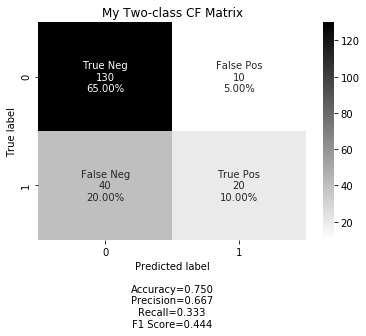

In [23]:
labels = ['True Neg','False Pos',
          'False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(conf_matrix, group_names=labels, categories=categories, cmap='binary', title='My Two-class CF Matrix')

Agora vamos visualizar qual foi a curva ROC da 'Random Forest'. Essa curva é comumnete utilizada para comparar diferentes modelos de machine learning. Em um momento oportuno podemos utilizar o código abaixo para comparar outros modelos com o que foi criado aqui.

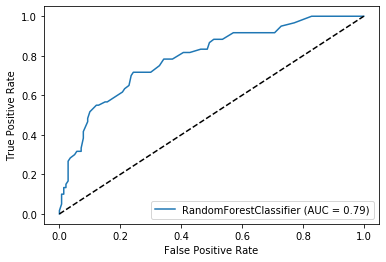

In [24]:
plot_roc_curve(forest, data_test, target_test)
plt.plot([0, 1], [0, 1], 'k--')

# Validação Cruzada & Outros modelos

In [25]:
from sklearn.model_selection import KFold, cross_val_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

Agora utiliznado o método de validação cruzada (Kfold), no qual toda a base de dados é separada em 10 partes de tamanho igual e 9 delas são utilizadas para treinar o modelo e 1 para testar, esse passo é repetido 10 vezes, cada vez utilizando uma parte distinta para o teste. Dessa forma é possível fazer uma média de 10 execuções minimizando a chance de viés ao separar os dados de treinamento e teste.

Além disso agora estamos utilizando outros três modelos, são eles: regressão logística, KNN e árvore de decisão - além da floresta aleatória utilizada de forma simples anteriormente.

Aqui estamos utilizando todos os modelos com os parâmetros padrões. Para melhorar o resultado podemos utilizar uma otimização de hiperparâmetros, para testar vários parâmetros e descobrir qual o melhor para cada modelo e em seguida escolher o melhor modelo entre todos.

In [26]:
def train_models(data, target):
    models = [(LogisticRegression(), 'LogisticRegression'),
              (KNeighborsClassifier(), 'KNeighborsClassifier'),
              (DecisionTreeClassifier(), 'DecisionTreeClassifier'),
              (RandomForestClassifier(), 'RandomForestClassifier')]

    for model, name in models:
        kfold = KFold(n_splits=10, random_state=None)
        cv_results_accuracy  = cross_val_score(model, data, target, cv=kfold, scoring='accuracy')
        cv_results_precision = cross_val_score(model, data, target, cv=kfold, scoring='precision')
        cv_results_recall    = cross_val_score(model, data, target, cv=kfold, scoring='recall')
        cv_results_f1        = cross_val_score(model, data, target, cv=kfold, scoring='f1')

        print(f""" Showing the mean values for {name}:
        accuracy: {cv_results_accuracy.mean():.3f} ± {cv_results_accuracy.std():.3f}
        precision: {cv_results_precision.mean():.3f} ± {cv_results_precision.std():.3f}
        recall: {cv_results_recall.mean():.3f} ± {cv_results_recall.std():.3f}
        f1-score: {cv_results_f1.mean():.3f} ± {cv_results_f1.std():.3f}
        """)

Convertendo novamente as classes para numérico e coletando separadamente os atributos e a classe

Aqui estamos colocando o interesse em identificar os maus pagadores (Bad = 1)

In [27]:
# USAR ESSE CÓDIGO COMENTADO CASO PRECISE VOLTAR BAD=1

# #changing numeric class to categorical
# df[21].replace({1: 'Good',0: 'Bad'}, inplace=True)

# #changing categorical class to numerical
# df[21].replace({'Good': 0,'Bad': 1}, inplace=True)

# #splitting attributes from class
# data   = df.iloc[:, :-1]
# target = df.iloc[:, -1:]

train_models(data, target)

 Showing the mean values for LogisticRegression:
        accuracy: 0.751 ± 0.059
        precision: 0.629 ± 0.126
        recall: 0.441 ± 0.138
        f1-score: 0.507 ± 0.116
        
 Showing the mean values for KNeighborsClassifier:
        accuracy: 0.658 ± 0.058
        precision: 0.375 ± 0.093
        recall: 0.238 ± 0.100
        f1-score: 0.286 ± 0.101
        
 Showing the mean values for DecisionTreeClassifier:
        accuracy: 0.705 ± 0.039
        precision: 0.495 ± 0.064
        recall: 0.499 ± 0.084
        f1-score: 0.482 ± 0.051
        
 Showing the mean values for RandomForestClassifier:
        accuracy: 0.773 ± 0.055
        precision: 0.699 ± 0.069
        recall: 0.426 ± 0.125
        f1-score: 0.492 ± 0.107
        


Aqui estamos colocando o interesse em identificar os bons pagadores (Good = 1)

In [28]:
#changing numeric class to categorical
df[21].replace({1: 'Bad',0: 'Good'}, inplace=True)

#changing categorical class to numerical
df[21].replace({'Good': 1,'Bad': 0}, inplace=True)

#splitting attributes from class
data   = df.iloc[:, :-1]
target = df.iloc[:, -1:]

train_models(data, target)

 Showing the mean values for LogisticRegression:
        accuracy: 0.751 ± 0.059
        precision: 0.786 ± 0.066
        recall: 0.889 ± 0.045
        f1-score: 0.833 ± 0.042
        
 Showing the mean values for KNeighborsClassifier:
        accuracy: 0.658 ± 0.058
        precision: 0.720 ± 0.064
        recall: 0.841 ± 0.032
        f1-score: 0.774 ± 0.043
        
 Showing the mean values for DecisionTreeClassifier:
        accuracy: 0.686 ± 0.035
        precision: 0.775 ± 0.046
        recall: 0.780 ± 0.052
        f1-score: 0.773 ± 0.041
        
 Showing the mean values for RandomForestClassifier:
        accuracy: 0.768 ± 0.052
        precision: 0.792 ± 0.060
        recall: 0.908 ± 0.034
        f1-score: 0.840 ± 0.036
        


Como o objetivo maior desta análise é encontrar os maus pagadores, para que diminua a chance de inadimplência vamos olhar os resultados de quando colocamos a classe "Bad" em evidência e vamos dar prioridade para a métrica "recall". O "recall" é utilizado quando o custo de um falso negativo (identificado como bom pagador, mas que é mau pagador) pode gerar grandes problemas, que é o nosso caso.

foi notado que o melhor resultado objetido, com as validações cruzadas, foi utilizando o modelo 'árvore de decisão', cujos resultados foram os seguintes:

accuracy: 0.705 ± 0.039

precision: 0.495 ± 0.064

recall: 0.499 ± 0.084

f1-score: 0.482 ± 0.051

In [29]:
# USAR ESSE CÓDIGO COMENTADO CASO PRECISE VOLTAR "BAD = 1"

#changing numeric class to categorical
df[21].replace({1: 'Good', 0: 'Bad'}, inplace=True)

#changing categorical class to numerical
df[21].replace({'Good': 0,'Bad': 1}, inplace=True)

#splitting attributes from class
data   = df.iloc[:, :-1]
target = df.iloc[:, -1:]

# Criando o modelo selecionado com todos os dados disponíveis

In [30]:
forest_final = DecisionTreeClassifier()
forest_final.fit(data, target)

DecisionTreeClassifier()

# Exportando o modelo

In [31]:
import pickle as pickle

with open('credit_risk_analysis_classification.pkl', 'wb') as my_file:
    pickle.dump(forest_final, my_file)

# Perguntas finais

Pergunta: Quais os próximos passos que você sugere para atingir o objetivo inicial de
automatizar o processo decisório e escalar a operação?

Resposta: Hospedar o modelo em produção em uma plataforma online, assim qualquer novo dado pode utilizar o modelo para predizer sua classe. Periodicamente pode ser retreinado o modelo incluindo os dados novos para manter sempre o mais robusto possível, levando em consideração qualquer mudança de padrão identificado nos dados novos.



Pergunta: Você tem sugestões para melhorar o resultado obtido?

Resposta: Primeiramente a classe desse dataset não é balanceada (70%, 30%). 
    O balanceamento pode ser feito removendo exemplos da classe majoritária (undersampling) ou replicando/criando exemplos na classe minoritária (oversampling), via distância ou com base na função de distribuição dos dados reais.

Outra coisa seria o 'One Hot encoding', que transforma um atributo categórico em vários atributos numéricos binários. Essa técnica pode melhorar o resultado em modelos que trabalham melhor apenas com dados numéricos.

Embora a quantidade de dados (1000) não seja tão grande, é possível tentar a remoção de outliers - valores muito fora do padrão dos demais em uma mesma série.

Aqui estamos utilizando todos os modelos de machine learning com os parâmetros padrões, podemos utilizar também uma otimização de hiperparâmetros para testar vários parâmetros e descobrir qual o melhor para cada modelo e em seguida escolher o melhor modelo entre todos testados.